This code runs from the 'Kaggle_Whale' directory. It assumes all training images (JPG files) located in './img/*/', and the annotation (JSON file) present under './annotations/'.

In [1]:
from PIL import Image
import os
import json

size = [720, 480]  # All input images would be resized accordingly
val_ratio = 0.2    # how many images would be reserved for validation

In [2]:
work_dir = './'

if not os.path.exists(work_dir + 'train_720x480/'):
        os.makedirs(work_dir + 'train_720x480/')

In [3]:
input_dir = work_dir + 'annotations/'
output_dir = work_dir + 'train_720x480/'
json_file = 'whale_faces_Vinh.json'

box_widths  = []  # widths of the boudning boxes after resizing
box_heights = []  # heights of the boudning boxes after resizing

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Read json
with open(input_dir+json_file) as json_data:
    d = json.load(json_data)

for i in range(len(d)):
    # Resize image
    fn =  str(d[i]['filename'])    
    im = Image.open(os.path.join(input_dir,fn))
    print('{}: {}x{}'.format(fn,im.size[0],im.size[1]))
    # Pick the side which needs to be scaled down the most
    scale = min(float(size[0])/im.size[0],float(size[1])/im.size[1])
    im = im.resize((int(im.size[0]*scale),int(im.size[1]*scale)),
                   Image.ANTIALIAS)
    # Padding on either right or bottom if necessary
    im = im.crop((0,0,size[0],size[1]))
    resized_path = output_dir + os.path.basename(fn)
    # Save the resized image
    im.save(resized_path)
    
    # Modify bounding boxes to match image scaling
    for j in range(len(d[i]['annotations'])):
        x = d[i]['annotations'][j]['x'] * scale
        y = d[i]['annotations'][j]['y'] * scale
        w = d[i]['annotations'][j]['width'] * scale
        h = d[i]['annotations'][j]['height'] * scale
        # Fix to avoid x, y, w, h out of bound
        if x < 0:
            w += x
            if w < 0: w = 20  # this should not happen
            x = 0
        if y < 0:
            h += y
            if h < 0: h = 20  # this should not happen
            y = 0
        if x+w > size[0]:
            w = size[0] - x
        if y+h > size[1]:
            h = size[1] - y
        d[i]['annotations'][j]['x'] = x
        d[i]['annotations'][j]['y'] = y
        d[i]['annotations'][j]['width'] = w 
        d[i]['annotations'][j]['height'] = h
        d[i]['filename'] = '../train_720x480/' + os.path.basename(fn)
        box_widths.append(w)
        box_heights.append(h)

# Save the updated JSON file
with open(input_dir + 'whale_faces_720x480.json', 'w') as fp:
    json.dump(d, fp, indent=0)

../imgs/whale_34663/w_7001.jpg: 5184x3456
../imgs/whale_82089/w_1491.jpg: 3072x2048
../imgs/whale_89211/w_6480.jpg: 3072x2048
../imgs/whale_95370/w_1991.jpg: 2464x1648
../imgs/whale_25878/w_9019.jpg: 3072x2048
../imgs/whale_24458/w_1455.jpg: 3072x2048
../imgs/whale_29172/w_246.jpg: 5184x3456
../imgs/whale_65586/w_5937.jpg: 3072x2048
../imgs/whale_71062/w_6896.jpg: 3072x2048
../imgs/whale_69459/w_8352.jpg: 5184x3456
../imgs/whale_62939/w_5463.jpg: 5184x3456
../imgs/whale_36851/w_2866.jpg: 3072x2048
../imgs/whale_48813/w_3496.jpg: 3072x2048
../imgs/whale_34656/w_2440.jpg: 3072x2048
../imgs/whale_17785/w_1277.jpg: 3072x2048
../imgs/whale_46974/w_9265.jpg: 3072x2048
../imgs/whale_97440/w_8600.jpg: 3072x2048
../imgs/whale_04397/w_9315.jpg: 5184x3456
../imgs/whale_10583/w_1316.jpg: 3072x2048
../imgs/whale_15079/w_7.jpg: 3072x2048
../imgs/whale_33152/w_4135.jpg: 3504x2336
../imgs/whale_95091/w_7263.jpg: 3072x2048
../imgs/whale_82602/w_2557.jpg: 3072x2048
../imgs/whale_38681/w_83.jpg: 3072x204

../imgs/whale_17785/w_9452.jpg: 3072x2048
../imgs/whale_19027/w_8172.jpg: 3072x2048
../imgs/whale_72327/w_5392.jpg: 3072x2048
../imgs/whale_48490/w_1895.jpg: 5184x3456
../imgs/whale_52759/w_9013.jpg: 3072x2048
../imgs/whale_87155/w_8355.jpg: 3072x2048
../imgs/whale_87604/w_5008.jpg: 3072x2048
../imgs/whale_44071/w_8100.jpg: 3072x2048
../imgs/whale_18158/w_7321.jpg: 3072x2048
../imgs/whale_05661/w_5785.jpg: 3072x2048
../imgs/whale_88147/w_6250.jpg: 3072x2048
../imgs/whale_49877/w_1252.jpg: 3072x2048
../imgs/whale_75215/w_5750.jpg: 3072x2048
../imgs/whale_67036/w_2390.jpg: 3072x2048
../imgs/whale_51538/w_9014.jpg: 3072x2048
../imgs/whale_41921/w_1162.jpg: 5184x3456
../imgs/whale_52100/w_1064.jpg: 3072x2048
../imgs/whale_12609/w_3456.jpg: 3072x2048
../imgs/whale_90377/w_2070.jpg: 3072x2048
../imgs/whale_53079/w_9430.jpg: 3072x2048
../imgs/whale_58747/w_4370.jpg: 3072x2048
../imgs/whale_57338/w_4578.jpg: 5184x3456
../imgs/whale_94546/w_3617.jpg: 3072x2048
../imgs/whale_51603/w_1795.jpg: 30

../imgs/whale_40169/w_3207.jpg: 3072x2048
../imgs/whale_78372/w_1913.jpg: 5184x3456
../imgs/whale_48415/w_8684.jpg: 3072x2048
../imgs/whale_37154/w_143.jpg: 3072x2048
../imgs/whale_06967/w_9072.jpg: 3072x2048
../imgs/whale_37301/w_1399.jpg: 3072x2048
../imgs/whale_73684/w_2160.jpg: 5184x3456
../imgs/whale_33140/w_298.jpg: 5184x3456
../imgs/whale_08181/w_1265.jpg: 5184x3456
../imgs/whale_38681/w_5290.jpg: 3072x2048
../imgs/whale_36851/w_9373.jpg: 3072x2048
../imgs/whale_86527/w_4883.jpg: 3072x2048
../imgs/whale_36437/w_6544.jpg: 3072x2048
../imgs/whale_15519/w_5207.jpg: 5184x3456
../imgs/whale_38008/w_3530.jpg: 3072x2048
../imgs/whale_67614/w_3198.jpg: 3072x2048
../imgs/whale_17604/w_5466.jpg: 3072x2048
../imgs/whale_58362/w_1014.jpg: 3072x2048
../imgs/whale_37269/w_6384.jpg: 3072x2048
../imgs/whale_13789/w_1804.jpg: 3072x2048
../imgs/whale_38681/w_2171.jpg: 3072x2048
../imgs/whale_66353/w_6263.jpg: 2464x1648
../imgs/whale_38681/w_6406.jpg: 5184x3456
../imgs/whale_37154/w_3071.jpg: 3072

../imgs/whale_52342/w_6878.jpg: 3072x2048
../imgs/whale_24458/w_9450.jpg: 3072x2048
../imgs/whale_10583/w_6058.jpg: 3072x2048
../imgs/whale_79648/w_9424.jpg: 3072x2048
../imgs/whale_38906/w_648.jpg: 4992x3328
../imgs/whale_16406/w_9118.jpg: 3072x2048
../imgs/whale_38288/w_6035.jpg: 3072x2048
../imgs/whale_27221/w_3830.jpg: 5184x3456
../imgs/whale_06334/w_2525.jpg: 5184x3456
../imgs/whale_58972/w_4234.jpg: 3072x2048
../imgs/whale_07647/w_1845.jpg: 3072x2048
../imgs/whale_85670/w_2875.jpg: 3072x2048
../imgs/whale_26288/w_1531.jpg: 3072x2048
../imgs/whale_59255/w_7708.jpg: 3072x2048
../imgs/whale_88547/w_2433.jpg: 3072x2048
../imgs/whale_25715/w_7983.jpg: 5184x3456
../imgs/whale_09651/w_5676.jpg: 3072x2048
../imgs/whale_06967/w_3286.jpg: 3072x2048
../imgs/whale_38681/w_944.jpg: 5184x3456
../imgs/whale_63541/w_6120.jpg: 3072x2048
../imgs/whale_05349/w_9251.jpg: 3072x2048
../imgs/whale_81875/w_8086.jpg: 3072x2048
../imgs/whale_67685/w_9137.jpg: 3072x2048
../imgs/whale_11099/w_3653.jpg: 5184

../imgs/whale_86585/w_579.jpg: 3072x2048
../imgs/whale_46169/w_3478.jpg: 3072x2048
../imgs/whale_38681/w_2629.jpg: 3072x2048
../imgs/whale_28892/w_4937.jpg: 3072x2048
../imgs/whale_48386/w_5720.jpg: 3072x2048
../imgs/whale_38894/w_7303.jpg: 5184x3456
../imgs/whale_63948/w_7683.jpg: 3072x2048
../imgs/whale_75767/w_239.jpg: 3072x2048
../imgs/whale_25878/w_7713.jpg: 3072x2048
../imgs/whale_23855/w_2490.jpg: 3072x2048
../imgs/whale_82089/w_3455.jpg: 3072x2048
../imgs/whale_73666/w_3245.jpg: 3072x2048
../imgs/whale_63816/w_6143.jpg: 3072x2048
../imgs/whale_75767/w_9224.jpg: 5184x3456
../imgs/whale_51195/w_7596.jpg: 3072x2048
../imgs/whale_48813/w_3404.jpg: 3072x2048
../imgs/whale_74625/w_4402.jpg: 3072x2048
../imgs/whale_78280/w_7297.jpg: 3072x2048
../imgs/whale_80947/w_6486.jpg: 3072x2048
../imgs/whale_98618/w_7002.jpg: 3072x2048
../imgs/whale_22101/w_8997.jpg: 5184x3456
../imgs/whale_98746/w_3518.jpg: 3072x2048
../imgs/whale_74232/w_6784.jpg: 3072x2048
../imgs/whale_90244/w_2855.jpg: 5184

../imgs/whale_38681/w_492.jpg: 3072x2048
../imgs/whale_18989/w_9391.jpg: 5184x3456
../imgs/whale_08324/w_6815.jpg: 3072x2048
../imgs/whale_17604/w_9175.jpg: 3072x2048
../imgs/whale_74232/w_2080.jpg: 2464x1648
../imgs/whale_19041/w_1586.jpg: 3072x2048
../imgs/whale_12609/w_4179.jpg: 3072x2048
../imgs/whale_32087/w_4552.jpg: 3072x2048
../imgs/whale_34663/w_3319.jpg: 3072x2048
../imgs/whale_76398/w_8150.jpg: 3072x2048
../imgs/whale_11625/w_5904.jpg: 5184x3456
../imgs/whale_33140/w_7128.jpg: 3072x2048
../imgs/whale_87604/w_2571.jpg: 3072x2048
../imgs/whale_64989/w_5047.jpg: 3072x2048
../imgs/whale_52505/w_2812.jpg: 3072x2048
../imgs/whale_82064/w_4087.jpg: 3072x2048
../imgs/whale_43045/w_5003.jpg: 3072x2048
../imgs/whale_49135/w_5361.jpg: 3072x2048
../imgs/whale_75215/w_5360.jpg: 3072x2048
../imgs/whale_87604/w_8556.jpg: 5184x3456
../imgs/whale_83892/w_9151.jpg: 3072x2048
../imgs/whale_21213/w_2138.jpg: 3072x2048
../imgs/whale_10977/w_4196.jpg: 3072x2048
../imgs/whale_80947/w_6348.jpg: 518

../imgs/whale_28263/w_956.jpg: 2464x1648
../imgs/whale_55079/w_867.jpg: 5184x3456
../imgs/whale_64526/w_7905.jpg: 3072x2048
../imgs/whale_79199/w_2803.jpg: 3072x2048
../imgs/whale_35844/w_2546.jpg: 5184x3456
../imgs/whale_46169/w_5868.jpg: 3072x2048
../imgs/whale_40885/w_2056.jpg: 5184x3456
../imgs/whale_39915/w_6732.jpg: 3072x2048
../imgs/whale_09181/w_7993.jpg: 3072x2048
../imgs/whale_84963/w_1620.jpg: 3072x2048
../imgs/whale_33961/w_4827.jpg: 3072x2048
../imgs/whale_49832/w_2828.jpg: 3072x2048
../imgs/whale_44747/w_8929.jpg: 3072x2048
../imgs/whale_32702/w_1936.jpg: 3072x2048
../imgs/whale_78395/w_3524.jpg: 3072x2048
../imgs/whale_60921/w_2900.jpg: 3072x2048
../imgs/whale_64714/w_6402.jpg: 3072x2048
../imgs/whale_24815/w_9237.jpg: 3072x2048
../imgs/whale_98633/w_2743.jpg: 3072x2048
../imgs/whale_70138/w_6914.jpg: 3072x2048
../imgs/whale_68116/w_1340.jpg: 3072x2048
../imgs/whale_47858/w_6911.jpg: 5184x3456
../imgs/whale_88756/w_5432.jpg: 3072x2048
../imgs/whale_02608/w_6727.jpg: 5184

../imgs/whale_95370/w_8996.jpg: 3072x2048
../imgs/whale_97882/w_2020.jpg: 3072x2048
../imgs/whale_64937/w_473.jpg: 3072x2048
../imgs/whale_41805/w_675.jpg: 3072x2048
../imgs/whale_08181/w_4230.jpg: 3072x2048
../imgs/whale_55079/w_3815.jpg: 5184x3456
../imgs/whale_72820/w_3305.jpg: 3072x2048
../imgs/whale_97688/w_740.jpg: 3072x2048
../imgs/whale_74232/w_8840.jpg: 3072x2048
../imgs/whale_83892/w_783.jpg: 3072x2048
../imgs/whale_64274/w_8317.jpg: 3504x2336
../imgs/whale_36851/w_2495.jpg: 3072x2048
../imgs/whale_28892/w_2578.jpg: 3072x2048
../imgs/whale_72820/w_1516.jpg: 3072x2048
../imgs/whale_53889/w_8653.jpg: 3072x2048
../imgs/whale_32021/w_6069.jpg: 3072x2048
../imgs/whale_66935/w_8374.jpg: 3072x2048
../imgs/whale_78280/w_1556.jpg: 3072x2048
../imgs/whale_65586/w_8354.jpg: 5184x3456
../imgs/whale_15079/w_6376.jpg: 3072x2048
../imgs/whale_71062/w_8489.jpg: 3072x2048
../imgs/whale_39915/w_1325.jpg: 3072x2048
../imgs/whale_80124/w_9298.jpg: 5184x3456
../imgs/whale_74935/w_7605.jpg: 3072x2

../imgs/whale_48633/w_3692.jpg: 3072x2048
../imgs/whale_10005/w_4273.jpg: 5184x3456
../imgs/whale_19027/w_6548.jpg: 3072x2048
../imgs/whale_17604/w_8126.jpg: 3072x2048
../imgs/whale_10583/w_3956.jpg: 3072x2048
../imgs/whale_23821/w_7358.jpg: 5184x3456
../imgs/whale_38543/w_6023.jpg: 3072x2048
../imgs/whale_89456/w_5831.jpg: 3072x2048
../imgs/whale_39915/w_4242.jpg: 3072x2048
../imgs/whale_73666/w_1815.jpg: 3072x2048
../imgs/whale_36851/w_5469.jpg: 5184x3456
../imgs/whale_37658/w_6161.jpg: 3072x2048
../imgs/whale_51195/w_4247.jpg: 3072x2048
../imgs/whale_78280/w_8451.jpg: 3072x2048
../imgs/whale_14270/w_7100.jpg: 3072x2048
../imgs/whale_78785/w_7927.jpg: 3072x2048
../imgs/whale_99326/w_3793.jpg: 5184x3456
../imgs/whale_41776/w_2487.jpg: 3072x2048
../imgs/whale_52749/w_1290.jpg: 3072x2048
../imgs/whale_40169/w_7408.jpg: 3072x2048
../imgs/whale_77693/w_4824.jpg: 5184x3456
../imgs/whale_03935/w_2222.jpg: 5184x3456
../imgs/whale_69459/w_3295.jpg: 3072x2048
../imgs/whale_13789/w_8180.jpg: 30

../imgs/whale_38681/w_1221.jpg: 5184x3456
../imgs/whale_64526/w_1674.jpg: 3072x2048
../imgs/whale_80947/w_3690.jpg: 5184x3456
../imgs/whale_52749/w_6262.jpg: 3072x2048
../imgs/whale_51538/w_4916.jpg: 3072x2048
../imgs/whale_75413/w_3539.jpg: 5184x3456
../imgs/whale_37301/w_1204.jpg: 3072x2048
../imgs/whale_74162/w_7659.jpg: 3072x2048
../imgs/whale_55079/w_6524.jpg: 5184x3456
../imgs/whale_84963/w_3441.jpg: 3072x2048
../imgs/whale_12661/w_734.jpg: 3072x2048
../imgs/whale_33723/w_4140.jpg: 3072x2048
../imgs/whale_35594/w_4965.jpg: 3072x2048
../imgs/whale_48813/w_8893.jpg: 5184x3456
../imgs/whale_73136/w_5654.jpg: 3072x2048
../imgs/whale_22101/w_5152.jpg: 5184x3456
../imgs/whale_66935/w_5677.jpg: 3072x2048
../imgs/whale_81768/w_4324.jpg: 3072x2048
../imgs/whale_98151/w_4126.jpg: 3072x2048
../imgs/whale_79199/w_7503.jpg: 3072x2048
../imgs/whale_67614/w_5322.jpg: 3072x2048
../imgs/whale_78395/w_7121.jpg: 3072x2048
../imgs/whale_31739/w_368.jpg: 3072x2048
../imgs/whale_34663/w_1933.jpg: 5184

../imgs/whale_69619/w_3763.jpg: 3072x2048
../imgs/whale_34663/w_6616.jpg: 3072x2048
../imgs/whale_43971/w_1120.jpg: 3072x2048
../imgs/whale_68116/w_3089.jpg: 3072x2048
../imgs/whale_08017/w_7133.jpg: 3072x2048
../imgs/whale_14094/w_4477.jpg: 3072x2048
../imgs/whale_04397/w_2244.jpg: 3072x2048
../imgs/whale_78372/w_2460.jpg: 3072x2048
../imgs/whale_82554/w_2882.jpg: 3072x2048
../imgs/whale_40169/w_3604.jpg: 3072x2048
../imgs/whale_41776/w_2539.jpg: 3072x2048
../imgs/whale_99558/w_5874.jpg: 2464x1648
../imgs/whale_03227/w_6906.jpg: 5184x3456
../imgs/whale_08181/w_8357.jpg: 3072x2048
../imgs/whale_26288/w_8319.jpg: 3072x2048
../imgs/whale_89615/w_4672.jpg: 5184x3456
../imgs/whale_67801/w_4958.jpg: 5184x3456
../imgs/whale_08181/w_2861.jpg: 3072x2048
../imgs/whale_64989/w_5692.jpg: 5184x3456
../imgs/whale_55333/w_1454.jpg: 5184x3456
../imgs/whale_33140/w_4603.jpg: 5184x3456
../imgs/whale_29858/w_1453.jpg: 3072x2048
../imgs/whale_20248/w_212.jpg: 3072x2048
../imgs/whale_77693/w_2537.jpg: 307

../imgs/whale_89211/w_2732.jpg: 3072x2048
../imgs/whale_05784/w_3603.jpg: 2464x1648
../imgs/whale_35430/w_3916.jpg: 3072x2048
../imgs/whale_30331/w_158.jpg: 5184x3456
../imgs/whale_83791/w_5189.jpg: 3072x2048
../imgs/whale_29569/w_2747.jpg: 3072x2048
../imgs/whale_06339/w_71.jpg: 3072x2048
../imgs/whale_78280/w_6045.jpg: 3072x2048
../imgs/whale_64937/w_3184.jpg: 5184x3456
../imgs/whale_83892/w_2067.jpg: 3072x2048
../imgs/whale_23847/w_316.jpg: 3072x2048
../imgs/whale_79166/w_2895.jpg: 3072x2048
../imgs/whale_87604/w_7652.jpg: 3072x2048
../imgs/whale_79166/w_416.jpg: 3072x2048
../imgs/whale_72327/w_8690.jpg: 3072x2048
../imgs/whale_53580/w_641.jpg: 3072x2048
../imgs/whale_99573/w_2234.jpg: 3072x2048
../imgs/whale_95370/w_1563.jpg: 3072x2048
../imgs/whale_83157/w_6131.jpg: 5184x3456
../imgs/whale_90271/w_8717.jpg: 5184x3456
../imgs/whale_55079/w_4138.jpg: 5184x3456
../imgs/whale_90244/w_2686.jpg: 3072x2048
../imgs/whale_35594/w_142.jpg: 3072x2048
../imgs/whale_06997/w_6374.jpg: 3072x2048

../imgs/whale_35004/w_1298.jpg: 3072x2048
../imgs/whale_05661/w_7423.jpg: 3072x2048
../imgs/whale_41776/w_3138.jpg: 3072x2048
../imgs/whale_55333/w_9428.jpg: 3072x2048
../imgs/whale_36851/w_6948.jpg: 3072x2048
../imgs/whale_26288/w_4820.jpg: 3072x2048
../imgs/whale_41776/w_6174.jpg: 3072x2048
../imgs/whale_81768/w_6751.jpg: 3504x2336
../imgs/whale_52505/w_562.jpg: 3072x2048
../imgs/whale_08181/w_3600.jpg: 3072x2048
../imgs/whale_32087/w_2048.jpg: 5184x3456
../imgs/whale_79823/w_3287.jpg: 3072x2048
../imgs/whale_60451/w_5978.jpg: 3072x2048
../imgs/whale_47734/w_8231.jpg: 3072x2048
../imgs/whale_20448/w_9383.jpg: 3072x2048
../imgs/whale_68774/w_6456.jpg: 3072x2048
../imgs/whale_32702/w_3127.jpg: 3072x2048
../imgs/whale_08637/w_7104.jpg: 2464x1648
../imgs/whale_13863/w_8982.jpg: 3072x2048
../imgs/whale_78280/w_3777.jpg: 3072x2048
../imgs/whale_83157/w_7804.jpg: 5184x3456
../imgs/whale_64634/w_6022.jpg: 3072x2048
../imgs/whale_59255/w_5930.jpg: 3072x2048
../imgs/whale_87155/w_2120.jpg: 307

../imgs/whale_40169/w_6539.jpg: 3072x2048
../imgs/whale_90957/w_6383.jpg: 3072x2048
../imgs/whale_85464/w_7699.jpg: 3072x2048
../imgs/whale_74935/w_461.jpg: 3072x2048
../imgs/whale_73666/w_4449.jpg: 3072x2048
../imgs/whale_81136/w_7891.jpg: 3072x2048
../imgs/whale_33152/w_3649.jpg: 3072x2048
../imgs/whale_67036/w_4493.jpg: 3072x2048
../imgs/whale_11076/w_6452.jpg: 3072x2048
../imgs/whale_95091/w_7045.jpg: 5184x3456
../imgs/whale_98151/w_1079.jpg: 5184x3456
../imgs/whale_32087/w_4195.jpg: 3072x2048
../imgs/whale_58010/w_5248.jpg: 3072x2048
../imgs/whale_59255/w_8063.jpg: 3072x2048
../imgs/whale_03227/w_2236.jpg: 5184x3456
../imgs/whale_30331/w_5418.jpg: 3072x2048
../imgs/whale_06334/w_9415.jpg: 3072x2048
../imgs/whale_32198/w_5554.jpg: 5184x3456
../imgs/whale_78280/w_4722.jpg: 5184x3456
../imgs/whale_98151/w_4811.jpg: 5184x3456
../imgs/whale_38681/w_4988.jpg: 5184x3456
../imgs/whale_90957/w_6189.jpg: 3072x2048
../imgs/whale_24815/w_6606.jpg: 3072x2048
../imgs/whale_92153/w_1268.jpg: 307

../imgs/whale_22118/w_1342.jpg: 3072x2048
../imgs/whale_52505/w_752.jpg: 3072x2048
../imgs/whale_72327/w_8023.jpg: 3072x2048
../imgs/whale_03227/w_1669.jpg: 5184x3456
../imgs/whale_11555/w_9359.jpg: 3072x2048
../imgs/whale_33140/w_3856.jpg: 3072x2048
../imgs/whale_69459/w_9196.jpg: 3072x2048
../imgs/whale_08700/w_8952.jpg: 3072x2048
../imgs/whale_23847/w_2808.jpg: 3072x2048
../imgs/whale_23821/w_5046.jpg: 5184x3456
../imgs/whale_11242/w_1070.jpg: 5184x3456
../imgs/whale_08181/w_4229.jpg: 3072x2048
../imgs/whale_50021/w_4215.jpg: 3072x2048
../imgs/whale_35004/w_5309.jpg: 3072x2048
../imgs/whale_51195/w_8691.jpg: 3072x2048
../imgs/whale_45062/w_4056.jpg: 5184x3456
../imgs/whale_37154/w_2130.jpg: 3072x2048
../imgs/whale_83892/w_9053.jpg: 3072x2048
../imgs/whale_32198/w_3005.jpg: 5184x3456
../imgs/whale_82089/w_5918.jpg: 3072x2048
../imgs/whale_95370/w_7833.jpg: 3072x2048
../imgs/whale_79439/w_3010.jpg: 5184x3456
../imgs/whale_44747/w_3431.jpg: 5184x3456
../imgs/whale_43326/w_2324.jpg: 307

../imgs/whale_38288/w_4695.jpg: 5184x3456
../imgs/whale_74062/w_3973.jpg: 5184x3456
../imgs/whale_37301/w_8170.jpg: 3072x2048
../imgs/whale_65586/w_4507.jpg: 3072x2048
../imgs/whale_89271/w_2755.jpg: 3072x2048
../imgs/whale_00195/w_8913.jpg: 3072x2048
../imgs/whale_68116/w_6657.jpg: 3072x2048
../imgs/whale_36300/w_3144.jpg: 3072x2048
../imgs/whale_07331/w_998.jpg: 5184x3456
../imgs/whale_52749/w_4715.jpg: 3072x2048
../imgs/whale_31594/w_4027.jpg: 3072x2048
../imgs/whale_58362/w_7204.jpg: 3072x2048
../imgs/whale_86206/w_5498.jpg: 5184x3456
../imgs/whale_48497/w_9462.jpg: 3072x2048
../imgs/whale_81875/w_5780.jpg: 3072x2048
../imgs/whale_96385/w_5324.jpg: 3072x2048
../imgs/whale_82089/w_6802.jpg: 3072x2048
../imgs/whale_86585/w_2524.jpg: 5184x3456
../imgs/whale_84178/w_9047.jpg: 3072x2048
../imgs/whale_79823/w_3415.jpg: 3072x2048
../imgs/whale_17327/w_3348.jpg: 3072x2048
../imgs/whale_88478/w_7232.jpg: 3504x2336
../imgs/whale_41921/w_8812.jpg: 3072x2048
../imgs/whale_36851/w_6329.jpg: 518

../imgs/whale_55861/w_7766.jpg: 5184x3456
../imgs/whale_31594/w_2488.jpg: 3072x2048
../imgs/whale_35430/w_1414.jpg: 3072x2048
../imgs/whale_85464/w_2877.jpg: 3072x2048
../imgs/whale_49877/w_2766.jpg: 3072x2048
../imgs/whale_09062/w_3118.jpg: 3072x2048
../imgs/whale_23574/w_5747.jpg: 5184x3456
../imgs/whale_36154/w_1057.jpg: 3072x2048
../imgs/whale_48813/w_3462.jpg: 3072x2048
../imgs/whale_36437/w_9111.jpg: 3072x2048
../imgs/whale_29294/w_1458.jpg: 3072x2048
../imgs/whale_23821/w_632.jpg: 3072x2048
../imgs/whale_37269/w_2958.jpg: 3072x2048
../imgs/whale_95091/w_2643.jpg: 5184x3456
../imgs/whale_57338/w_4993.jpg: 5184x3456
../imgs/whale_20448/w_3801.jpg: 3072x2048
../imgs/whale_28892/w_1666.jpg: 3072x2048
../imgs/whale_51195/w_6639.jpg: 3072x2048
../imgs/whale_24458/w_8619.jpg: 3072x2048
../imgs/whale_86158/w_6614.jpg: 5184x3456
../imgs/whale_38894/w_9319.jpg: 3072x2048
../imgs/whale_61461/w_3583.jpg: 2464x1648
../imgs/whale_12609/w_2569.jpg: 5184x3456
../imgs/whale_44127/w_4927.jpg: 307

../imgs/whale_08439/w_818.jpg: 5184x3456
../imgs/whale_17785/w_8358.jpg: 3072x2048
../imgs/whale_74625/w_5358.jpg: 3072x2048
../imgs/whale_37014/w_7594.jpg: 5184x3456
../imgs/whale_29569/w_8884.jpg: 3072x2048
../imgs/whale_31594/w_317.jpg: 3072x2048
../imgs/whale_28263/w_1660.jpg: 2464x1648
../imgs/whale_52342/w_7695.jpg: 3072x2048
../imgs/whale_90957/w_3364.jpg: 3072x2048
../imgs/whale_05661/w_7137.jpg: 3072x2048
../imgs/whale_67036/w_3674.jpg: 3072x2048
../imgs/whale_08439/w_8778.jpg: 3072x2048
../imgs/whale_99326/w_5178.jpg: 3072x2048
../imgs/whale_40169/w_5973.jpg: 5184x3456
../imgs/whale_66205/w_6442.jpg: 3072x2048
../imgs/whale_72820/w_2816.jpg: 3072x2048
../imgs/whale_08923/w_2781.jpg: 3072x2048
../imgs/whale_72820/w_2909.jpg: 3072x2048
../imgs/whale_74439/w_770.jpg: 3072x2048
../imgs/whale_36437/w_8597.jpg: 3072x2048
../imgs/whale_40169/w_1063.jpg: 3072x2048
../imgs/whale_81768/w_570.jpg: 3072x2048
../imgs/whale_07863/w_8838.jpg: 3072x2048
../imgs/whale_64634/w_2157.jpg: 3072x2

../imgs/whale_49210/w_9360.jpg: 3072x2048
../imgs/whale_48966/w_8074.jpg: 3072x2048
../imgs/whale_38191/w_5266.jpg: 5184x3456
../imgs/whale_96385/w_7828.jpg: 3072x2048
../imgs/whale_11242/w_7406.jpg: 5184x3456
../imgs/whale_60729/w_7284.jpg: 5184x3456
../imgs/whale_97542/w_1816.jpg: 3072x2048
../imgs/whale_06339/w_7724.jpg: 5184x3456
../imgs/whale_32198/w_4610.jpg: 5184x3456
../imgs/whale_53580/w_1653.jpg: 3072x2048
../imgs/whale_38288/w_7742.jpg: 5184x3456
../imgs/whale_48497/w_181.jpg: 5184x3456
../imgs/whale_62655/w_3818.jpg: 3072x2048
../imgs/whale_58747/w_5704.jpg: 5184x3456
../imgs/whale_97688/w_2545.jpg: 3072x2048
../imgs/whale_41125/w_622.jpg: 3072x2048
../imgs/whale_36231/w_5957.jpg: 3072x2048
../imgs/whale_40169/w_2976.jpg: 3072x2048
../imgs/whale_58972/w_482.jpg: 5184x3456
../imgs/whale_86585/w_2538.jpg: 3072x2048
../imgs/whale_73666/w_8891.jpg: 3072x2048
../imgs/whale_74162/w_8734.jpg: 3072x2048
../imgs/whale_48966/w_2437.jpg: 3072x2048
../imgs/whale_38681/w_2389.jpg: 3072x

../imgs/whale_84264/w_8495.jpg: 3072x2048
../imgs/whale_38008/w_3826.jpg: 3072x2048
../imgs/whale_12820/w_4023.jpg: 3504x2336
../imgs/whale_54497/w_4045.jpg: 3072x2048
../imgs/whale_79823/w_376.jpg: 3072x2048
../imgs/whale_41881/w_202.jpg: 3072x2048
../imgs/whale_49277/w_1789.jpg: 3072x2048
../imgs/whale_66935/w_9238.jpg: 3072x2048
../imgs/whale_52998/w_3612.jpg: 3072x2048
../imgs/whale_61461/w_8102.jpg: 3072x2048
../imgs/whale_88547/w_8421.jpg: 3072x2048
../imgs/whale_68789/w_1811.jpg: 5184x3456
../imgs/whale_38288/w_4951.jpg: 3072x2048
../imgs/whale_07647/w_465.jpg: 3072x2048
../imgs/whale_34488/w_7124.jpg: 3072x2048
../imgs/whale_89615/w_7542.jpg: 3072x2048
../imgs/whale_41805/w_7089.jpg: 3072x2048
../imgs/whale_26397/w_7447.jpg: 3072x2048
../imgs/whale_44071/w_1456.jpg: 3072x2048
../imgs/whale_81768/w_5860.jpg: 3072x2048
../imgs/whale_08923/w_6347.jpg: 3072x2048
../imgs/whale_60921/w_8009.jpg: 3072x2048
../imgs/whale_38288/w_4618.jpg: 3072x2048
../imgs/whale_85464/w_7238.jpg: 3072x

../imgs/whale_11242/w_1358.jpg: 3072x2048
../imgs/whale_90957/w_8118.jpg: 3072x2048
../imgs/whale_36154/w_733.jpg: 3072x2048
../imgs/whale_23847/w_3116.jpg: 2464x1648
../imgs/whale_29294/w_4187.jpg: 3072x2048
../imgs/whale_55079/w_2802.jpg: 3072x2048
../imgs/whale_48415/w_7956.jpg: 3072x2048
../imgs/whale_08017/w_1475.jpg: 3072x2048
../imgs/whale_26397/w_5171.jpg: 3072x2048
../imgs/whale_21160/w_8966.jpg: 3072x2048
../imgs/whale_63541/w_1993.jpg: 3072x2048
../imgs/whale_37658/w_3537.jpg: 5184x3456
../imgs/whale_64937/w_1527.jpg: 3072x2048
../imgs/whale_85670/w_1129.jpg: 3072x2048
../imgs/whale_73592/w_7032.jpg: 3072x2048
../imgs/whale_99573/w_7425.jpg: 3072x2048
../imgs/whale_43374/w_787.jpg: 3072x2048
../imgs/whale_27820/w_2145.jpg: 3072x2048
../imgs/whale_08017/w_6873.jpg: 3072x2048
../imgs/whale_36154/w_8593.jpg: 3072x2048
../imgs/whale_17528/w_6062.jpg: 3072x2048
../imgs/whale_88226/w_7758.jpg: 3072x2048
../imgs/whale_26686/w_4843.jpg: 5184x3456
../imgs/whale_81875/w_68.jpg: 5184x3

../imgs/whale_21873/w_6315.jpg: 3072x2048
../imgs/whale_92153/w_8502.jpg: 3072x2048
../imgs/whale_11555/w_6626.jpg: 3072x2048
../imgs/whale_23467/w_3482.jpg: 3072x2048
../imgs/whale_05349/w_6403.jpg: 3072x2048
../imgs/whale_08017/w_3427.jpg: 3072x2048
../imgs/whale_59173/w_6061.jpg: 5184x3456
../imgs/whale_27085/w_2865.jpg: 3072x2048
../imgs/whale_70904/w_2360.jpg: 3072x2048
../imgs/whale_46747/w_9190.jpg: 3072x2048
../imgs/whale_95370/w_3051.jpg: 3072x2048
../imgs/whale_32702/w_6125.jpg: 3072x2048
../imgs/whale_21873/w_1125.jpg: 5184x3456
../imgs/whale_78628/w_8500.jpg: 3072x2048
../imgs/whale_24458/w_5246.jpg: 3072x2048
../imgs/whale_17528/w_5494.jpg: 3072x2048
../imgs/whale_48633/w_3589.jpg: 3072x2048
../imgs/whale_52749/w_3988.jpg: 3072x2048
../imgs/whale_65586/w_438.jpg: 3072x2048
../imgs/whale_52100/w_6716.jpg: 3072x2048
../imgs/whale_92515/w_3670.jpg: 5184x3456
../imgs/whale_49135/w_6879.jpg: 3072x2048
../imgs/whale_10005/w_1604.jpg: 3072x2048
../imgs/whale_87291/w_1232.jpg: 307

../imgs/whale_95370/w_4779.jpg: 2464x1648
../imgs/whale_38894/w_539.jpg: 5184x3456
../imgs/whale_20248/w_4246.jpg: 3072x2048
../imgs/whale_55079/w_8908.jpg: 3072x2048
../imgs/whale_28892/w_2656.jpg: 3072x2048
../imgs/whale_14094/w_2210.jpg: 3072x2048
../imgs/whale_39293/w_3700.jpg: 3072x2048
../imgs/whale_46974/w_5734.jpg: 3072x2048
../imgs/whale_60921/w_1780.jpg: 3072x2048
../imgs/whale_30331/w_8088.jpg: 3072x2048
../imgs/whale_09913/w_4598.jpg: 3072x2048
../imgs/whale_07647/w_4471.jpg: 3072x2048
../imgs/whale_43971/w_8805.jpg: 3072x2048
../imgs/whale_51603/w_5803.jpg: 3072x2048
../imgs/whale_89615/w_6964.jpg: 3072x2048
../imgs/whale_72820/w_5960.jpg: 3072x2048
../imgs/whale_90820/w_1683.jpg: 3072x2048
../imgs/whale_81136/w_3054.jpg: 5184x3456
../imgs/whale_23574/w_2043.jpg: 3072x2048
../imgs/whale_95091/w_2758.jpg: 3072x2048
../imgs/whale_49530/w_3983.jpg: 3072x2048
../imgs/whale_43971/w_2462.jpg: 3072x2048
../imgs/whale_52749/w_7400.jpg: 3072x2048
../imgs/whale_58010/w_8269.jpg: 307

../imgs/whale_23847/w_1087.jpg: 3072x2048
../imgs/whale_64714/w_8772.jpg: 3072x2048
../imgs/whale_58010/w_4705.jpg: 3072x2048
../imgs/whale_35594/w_6522.jpg: 3072x2048
../imgs/whale_45062/w_5399.jpg: 3072x2048
../imgs/whale_67685/w_4905.jpg: 3072x2048
../imgs/whale_29294/w_3681.jpg: 3072x2048
../imgs/whale_17601/w_7266.jpg: 3072x2048
../imgs/whale_64989/w_6420.jpg: 3072x2048
../imgs/whale_34663/w_5377.jpg: 3072x2048
../imgs/whale_79948/w_6459.jpg: 3072x2048
../imgs/whale_03623/w_8785.jpg: 3072x2048
../imgs/whale_33140/w_1751.jpg: 3072x2048
../imgs/whale_82387/w_7873.jpg: 3072x2048
../imgs/whale_26654/w_315.jpg: 3072x2048
../imgs/whale_33195/w_754.jpg: 3072x2048
../imgs/whale_49530/w_1251.jpg: 5184x3456
../imgs/whale_36300/w_2921.jpg: 3072x2048
../imgs/whale_58309/w_7145.jpg: 5184x3456
../imgs/whale_39915/w_5905.jpg: 3072x2048
../imgs/whale_61461/w_3894.jpg: 3072x2048
../imgs/whale_17604/w_3155.jpg: 3072x2048
../imgs/whale_33140/w_9130.jpg: 5184x3456
../imgs/whale_19027/w_8010.jpg: 3072

Again, we can check/verify whale face annotations on the resized images with [sloth labeling tool](https://github.com/cvhciKIT/sloth), by executing the following shell command.

```shell
$ sloth -c annotations/slothwhales.py annotations/whale_faces_720x480.json
```

*** after resizing ***
min/max bounding box widths  = 271.4 / 26.8
min/max bounding box heights = 231.0 / 29.0


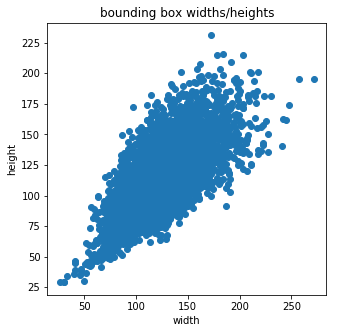

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

print('*** after resizing ***')
print('min/max bounding box widths  = {0:4.1f} / {1:4.1f}'.format(
    max(box_widths),min(box_widths)))
print('min/max bounding box heights = {0:4.1f} / {1:4.1f}'.format(
    max(box_heights),min(box_heights)))

plt.figure(figsize=(5, 5))

plt.subplot(1, 1, 1)
plt.scatter(np.array(box_widths),np.array(box_heights))
plt.title('bounding box widths/heights')
plt.xlabel('width')
plt.ylabel('height')

plt.show()

In [5]:
import random
import shutil

if os.path.exists(work_dir + 'detectnet_720x480/'):
    shutil.rmtree(work_dir + 'detectnet_720x480/')
os.makedirs(work_dir + 'detectnet_720x480/train/images/')
os.makedirs(work_dir + 'detectnet_720x480/train/labels/')
os.makedirs(work_dir + 'detectnet_720x480/val/images/')
os.makedirs(work_dir + 'detectnet_720x480/val/labels/')

According to NVIDIA DIGITS documentation, DetectNet label txt files are formatted as follows.

https://github.com/NVIDIA/DIGITS/tree/master/digits/extensions/data/objectDetection

The label files contain the following information, which can be read and written using the matlab tools (readLabels.m, writeLabels.m) provided within this devkit. All values (numerical or strings) are separated via spaces, each row corresponds to one object. The 15 columns represent:

```
#Values    Name      Description
----------------------------------------------------------------------------
   1    type         Describes the type of object: 'Car', 'Van', 'Truck',
                     'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram',
                     'Misc' or 'DontCare'
   1    truncated    Float from 0 (non-truncated) to 1 (truncated), where
                     truncated refers to the object leaving image boundaries
   1    occluded     Integer (0,1,2,3) indicating occlusion state:
                     0 = fully visible, 1 = partly occluded
                     2 = largely occluded, 3 = unknown
   1    alpha        Observation angle of object, ranging [-pi..pi]
   4    bbox         2D bounding box of object in the image (0-based index):
                     contains left, top, right, bottom pixel coordinates
   3    dimensions   3D object dimensions: height, width, length (in meters)
   3    location     3D object location x,y,z in camera coordinates (in meters)
   1    rotation_y   Rotation ry around Y-axis in camera coordinates [-pi..pi]
   1    score        Only for results: Float, indicating confidence in
                     detection, needed for p/r curves, higher is better.

Here, 'DontCare' labels denote regions in which objects have not been labeled, for example because they have been too far away from the laser scanner. To prevent such objects from being counted as false positives our evaluation script will ignore objects detected in don't care regions of the test set. You can use the don't care labels in the training set to avoid that your object detector is harvesting hard negatives from those areas, in case you consider non-object regions from the training images as negative examples.

......
```

In [8]:
input_dir = work_dir + 'train_720x480/'
json_file = './annotations/whale_faces_720x480.json'

# Read json
with open(json_file) as json_data:
    d = json.load(json_data)

for i in range(len(d)):
    output_dir = work_dir + 'detectnet_720x480/train/'
    if random.random() < val_ratio:
        output_dir = work_dir + 'detectnet_720x480/val/'
    # Copy the image over
    fn =  str(d[i]['filename'])
    shutil.copy(input_dir + fn, output_dir + 'images/')
    bn = os.path.basename(fn)
    fnbase, ext = os.path.splitext(bn)
    # One Label file per one image
    with open(output_dir + 'labels/' + fnbase + '.txt', 'w') as fp:
        # Convert annotations to required format
        for j in range(len(d[i]['annotations'])):
            l = d[i]['annotations'][j]['x']
            t = d[i]['annotations'][j]['y']
            r = l + d[i]['annotations'][j]['width']
            b = t + d[i]['annotations'][j]['height']
            
            type = 'Car'
            truncated = 0
            occluded  = 3
            alpha  = 0
            tail = '0 0 0 0 0 0 0 0'
            
            label = type + ' ' +            \
                    str(truncated) + ' ' +  \
                    str(occluded)  + ' ' +  \
                    str(alpha)     + ' ' +  \
                    str(l) + ' ' + str(t) + ' ' + str(r) + ' ' + str(b) + ' ' + tail
            fp.write(label + '\n')

Done. We now should have data ready for DetectNet training, organized as follows.

```
detectnet_720x480/train/
                  ├── images/
                  │   └── img_00001.jpg
                  └── labels/
                      └── img_00001.txt
detectnet_720x480/val/
                  ├── images/
                  │   └── img_00002.jpg
                  └── labels/
                      └── img_00002.txt
```

Verify number of images and lables.

In [9]:
!find detectnet_720x480/train/ -name "*.jpg" | wc -l
!find detectnet_720x480/train/ -name "*.txt" | wc -l
!find detectnet_720x480/val/ -name "*.jpg" | wc -l
!find detectnet_720x480/val/ -name "*.txt" | wc -l

3630
3630
914
914
